## LASSO回归

In [73]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd

In [74]:
boston = pd.read_csv("../assets/Boston.csv")
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


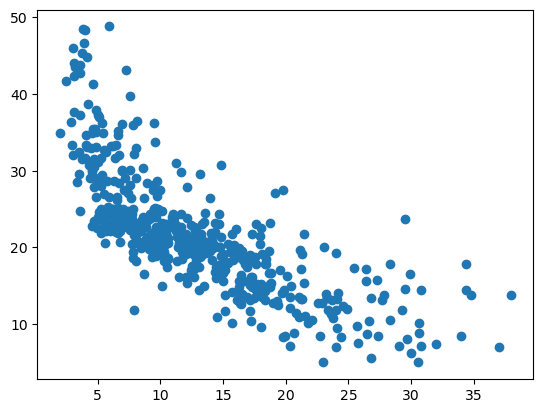

In [75]:
x = boston.values[:,12]
y = boston["medv"].values

x = x[y<50]
y = y[y<50]

plt.scatter(x,y)
plt.show()

In [76]:
from sklearn.model_selection import train_test_split

np.random.seed(666)
X_train, X_test, y_train, y_test = train_test_split(x.reshape(-1,1), y)

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()) 
    ])

In [78]:
poly_reg = PolynomialRegression(degree=20)
poly_reg.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=20)),
                ('std_scaler', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [79]:
from sklearn.metrics import mean_squared_error
y_predict = poly_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

58223.86867270348

In [80]:
def show_plot(model):
    plt.scatter(x, y)
    X_plot = np.linspace(0, 40, 100).reshape(100, 1)
    y_plot = model.predict(X_plot)
    plt.plot(X_plot[:,0], y_plot, color='red')
    plt.axis([0, 40, 0, 50])
    plt.show()

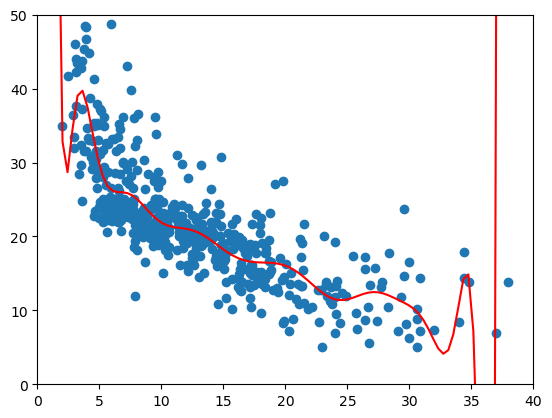

In [81]:
show_plot(poly_reg)

In [82]:
from sklearn.linear_model import Lasso

def LassoRegression(degree, alpha):
    # 构建一个包含多项式特征、标准化和Lasso回归的管道
    return Pipeline([
        # 生成指定阶数的多项式特征
        ("poly", PolynomialFeatures(degree=degree)),
        # 对特征进行标准化处理
        ("std_scaler", StandardScaler()),
        # 添加Lasso回归模型，alpha为正则化强度
        ("lasso_reg", Lasso(alpha=alpha))
    ])

In [83]:
lasso_reg = LassoRegression(20, 0.01)
lasso_reg.fit(X_train, y_train)
y_predict = lasso_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

22.299581121848522

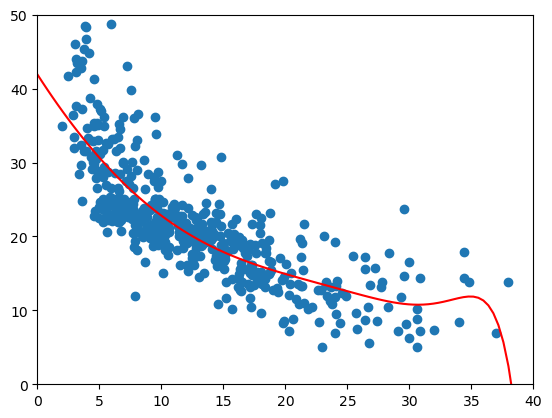

In [84]:
show_plot(lasso_reg)

## 岭回归

In [85]:
from sklearn.linear_model import Ridge

def RidgeRegression(degree, alpha):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)),
        ("std_scaler", StandardScaler()),
        ("ridge_reg", Ridge(alpha=alpha))
    ])

In [86]:
ridge_reg = RidgeRegression(20, 0.01)
ridge_reg.fit(X_train, y_train)
y_predict = ridge_reg.predict(X_test)
mean_squared_error(y_test, y_predict)

24.124637790108395

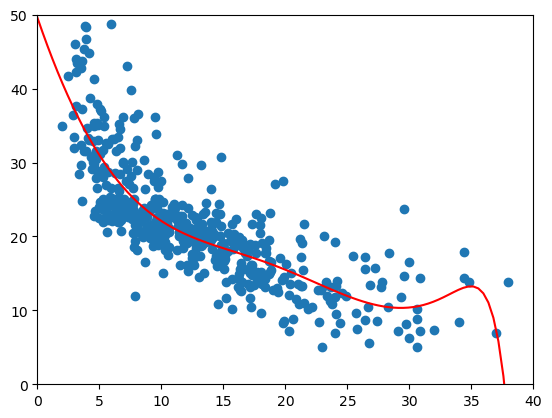

In [87]:
show_plot(ridge_reg)